Mounting Drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Reading csv data

In [0]:
import pandas as pd
df=pd.read_csv('/content/drive/My Drive/floral-pattern-classification/dress_patterns.csv')

In [0]:
df.head()

_unit_id   category  category:confidence  \
0  851505458       ikat               0.3487   
1  851505459      plain               1.0000   
2  851505460  polka dot               0.6709   
3  851505461      plain               1.0000   
4  851505462   geometry               0.7035   

                                           image_url  
0  http://s3-eu-west-1.amazonaws.com/we-attribute...  
1  http://s3-eu-west-1.amazonaws.com/we-attribute...  
2  http://s3-eu-west-1.amazonaws.com/we-attribute...  
3  http://s3-eu-west-1.amazonaws.com/we-attribute...  
4  http://s3-eu-west-1.amazonaws.com/we-attribute...

No of categories present in data

In [0]:
categories=df.category.unique()
categories

array(['ikat', 'plain', 'polka dot', 'geometry', 'floral', 'squares',
       'scales', 'animal', 'OTHER', 'stripes', 'tribal', 'houndstooth',
       'cartoon', 'chevron', 'stars', 'letter_numb', 'skull'],
      dtype=object)

**creating datasets from urls in the csv file**

In [0]:
!rm -r data
!mkdir data

rm: cannot remove 'data': No such file or directory


In [0]:
import shutil
import os
path='data/'
for i in set(list(df.category)):
  os.mkdir(os.path.join(path,i))

100%|██████████| 15702/15702 [51:32<00:00,  5.37it/s]


Text(0.5, 1.0, 'polka dot')

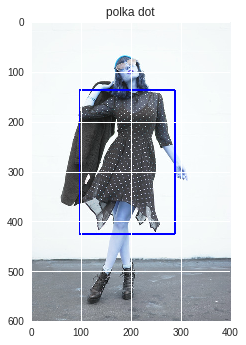

In [0]:
import cv2
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
import tqdm as tqdm
for i in tqdm.tqdm(range(0,15702)):
  req = urllib.request.urlopen(list(df.image_url)[i])
  arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
  cat=list(df.category)[i]
  im_name=str(list(df._unit_id)[i])+'.jpg'
  img = cv2.imdecode(arr, -1) 
  cv2.imwrite(os.path.join(path,cat,im_name),img)

plt.imshow(img)
plt.title(list(df.category)[i])

saving the created dataset to google drive

In [0]:
!cp -r data/ /content/drive/'My Drive'/floral-pattern-classification/

Accessing data from drive

In [0]:
data_path='/content/drive/My Drive/floral-pattern-classification/data'

In [0]:
!cd data && mkdir train 

In [0]:
!cp -r /content/drive/'My Drive'/floral-pattern-classification/data data/train/

**VISUALISING IMAGES**

Visualising saved data

In [0]:
import matplotlib.pyplot as plt
import os
import cv2
def show_samples(label):
  i=0
  f=plt.figure(figsize=(20,10))
  for images in list(os.listdir(os.path.join(data_path,label)))[0:5]:
    im=cv2.imread(os.path.join(data_path,label,images))
    a=f.add_subplot(1,5,i+1)
    i+=1
    a.axis('off')
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
    plt.title('class: '+str(label))
  
  

visualising images from class squares

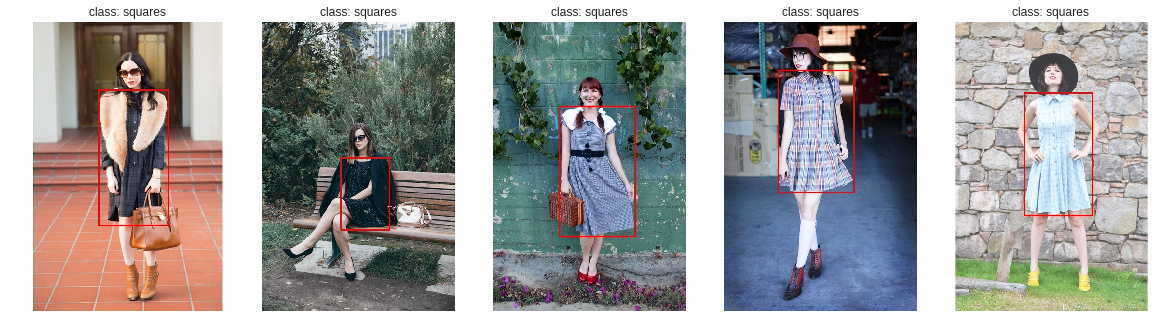

In [0]:
show_samples('squares')

Visualising images from class floral

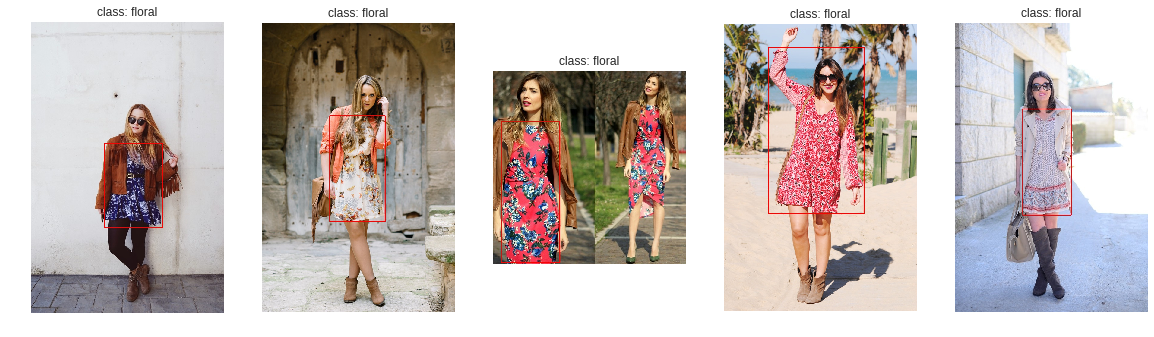

In [0]:
show_samples('floral')

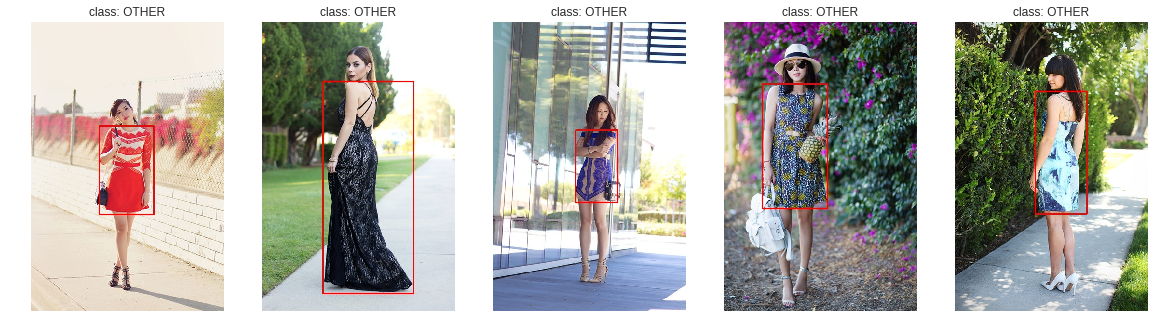

In [0]:
show_samples('OTHER')

In [0]:
import pandas as pd
df1=pd.read_csv('/content/drive/My Drive/floral-pattern-classification/dress_patterns.csv')
df1.set_index('_unit_id',inplace=True)
list(df1.loc[851505458])

['ikat',
 0.3487,
 'http://s3-eu-west-1.amazonaws.com/we-attributes/dress/23/5f635c0fa59f4270a6953f67dcddcda3.jpg.png']

Creating dataset with numpy array

In [0]:
import numpy as np
import os
import cv2
path='data/train/'
categories=sorted(list(df1.category.unique()))
sample_weights=[]
image_data=[]
labels=[]
for classes in os.listdir(path):
  for images in os.listdir(os.path.join(path,classes)):
    for i,c in enumerate(categories):
      if c==classes:
        labels.append(i)
        image_data.append(cv2.resize(cv2.imread(os.path.join(path,classes,images)),(128,128)))
        sample_weights.append(list(df1.loc[int(images[:-4])])[1])


checking data shape

In [0]:
X=np.array(image_data)
Y=np.array(labels)

In [0]:
X.shape,Y.shape,set(labels)

((15702, 128, 128, 3),
 (15702,),
 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16})

checking data distribution

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


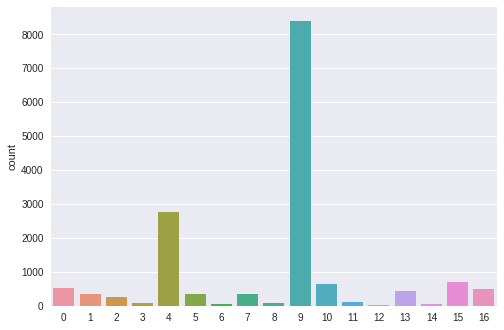

In [0]:
import seaborn as sns
sns.countplot(Y)

since data in category 4 and 9 is huge as compared to other classes **undersmapling** has to be performed

In [0]:
import numpy as np
import os
import cv2
path='/content/drive/My Drive/floral-pattern-classification/data/'
categories=sorted(list(df1.category.unique()))
sample_weights=[]
image_data=[]
labels=[]
for classes in os.listdir(path):
  if classes==categories[4] or classes==categories[9]:
    im_list=list(os.listdir(os.path.join(path,classes)))[:800]
  else:
    im_list=list(os.listdir(os.path.join(path,classes)))

    
  for images in im_list:
    for i,c in enumerate(categories):
      if c==classes:
        labels.append(i)
        image_data.append(cv2.resize(cv2.imread(os.path.join(path,classes,images)),(128,128)))
        sample_weights.append(list(df1.loc[int(images[:-4])])[1])

In [0]:
X=np.array(image_data)
Y=np.array(labels)

In [0]:
sample_weights=np.array(sample_weights)

saving the created numpy arrays to drive for easy usage

In [0]:
np.save('/content/drive/My Drive/floral-pattern-classification/X_data',X)
np.save('/content/drive/My Drive/floral-pattern-classification/Y_data',Y)
np.save('/content/drive/My Drive/floral-pattern-classification/sample_weights',sample_weights)

checking shape of the data

In [0]:
X.shape,Y.shape

((6141, 128, 128, 3), (6141,))

checking data distribution once again

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


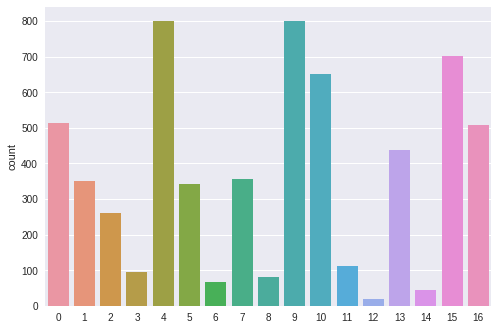

In [0]:
import seaborn as sns
sns.countplot(Y)

The data is still slightly imabalanced but that adjustment can be done by assigning higher value to the instances of the less-sampled class

randomly shuffling the data

In [0]:
import numpy as np
p=np.random.permutation(X.shape[0])
X=X[p]
Y=Y[p]
sample_weights=sample_weights[p]

Splitting data to train and test sets

In [0]:
splt_idx=int(0.2*X.shape[0])
X_test=X[0:splt_idx,:,:,:]
Y_test=Y[0:splt_idx,]
X_train=X[splt_idx:,:,:,:]
Y_train=Y[splt_idx:,]
sample_weight_train=sample_weights[splt_idx:,]

In [0]:
X_train=X_train/255.0
X_test=X_test/255.0

Computing weight of each class to adjust for imbalanced samples per class

In [0]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', np.unique(Y_train),Y_train)

In [0]:
def cumulative_s_weights(class_weights,sample_weights):
  unique, counts = np.unique(Y_train, return_counts=True)
  class_counts=dict(zip(unique, counts))
  s_weights=[]
  for i in range(counts.shape[0]):
    s_weights+=[class_weights[i]]*class_counts[i]
  s_weights=s_weights*sample_weight_train  
    
  return s_weights  
  


checking train and test shapes

In [113]:
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape,sample_weight_train.shape

((4913, 128, 128, 3), (4913,), (1228, 128, 128, 3), (1228,), (4913,))

Ensuring training set distribution is the same as the entire data distribution

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


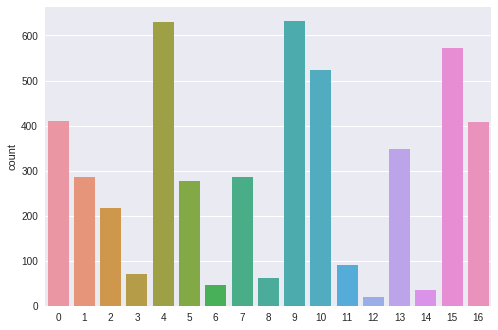

In [0]:
sns.countplot(Y_train)

Getting the no of classes from the dataframe created with the help of the csv file

In [0]:
num_classes=df1.category.unique().shape[0]


Necessary imports

In [0]:
from __future__ import print_function
import numpy as np
import gc
import keras
import keras.backend as K
from PIL import Image
from keras.datasets import mnist
from keras.models import Model
from keras.layers.recurrent import SimpleRNN, LSTM, GRU
from keras.optimizers import RMSprop, Adam
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers.wrappers import TimeDistributed
from keras.layers import Input
from keras.preprocessing.image import array_to_img
from keras.layers import DepthwiseConv2D
from keras.utils import np_utils
from keras.applications.vgg16 import VGG16
from keras.applications.mobilenet import MobileNet
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt

Using TensorFlow backend.


**Creating Model**

creating a Convolution Neural Network Model using keras

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(128, 128,3)))
model.add(Activation('relu'))

model.add(Conv2D(32, (5, 5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [0]:
model.add(Flatten())  
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
adam=Adam(lr=0.0001)
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [116]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 124, 124, 32)      2432      
_________________________________________________________________
activation_12 (Activation)   (None, 124, 124, 32)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 120, 120, 32)      25632     
_________________________________________________________________
activation_13 (Activation)   (None, 120, 120, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 60, 60, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 58, 58, 64)        18496     
_________________________________________________________________
activation_14 (Activation)   (None, 58, 58, 64)        0         
__________

Fitting the data to the Network by normalizing the images and converting the labels to one-hot vectors

In [117]:
history=model.fit(X_train,np_utils.to_categorical(Y_train),epochs=30,batch_size=32,validation_data=(X_test,np_utils.to_categorical(Y_test)),sample_weight=cumulative_s_weights(class_weights,sample_weight_train))

Train on 4913 samples, validate on 1228 samples
Epoch 1/30
4913/4913 [==============================] - 27s 5ms/step - loss: 2.0669 - acc: 0.1176 - val_loss: 2.6850 - val_acc: 0.1368
Epoch 2/30
4913/4913 [==============================] - 24s 5ms/step - loss: 2.0203 - acc: 0.1238 - val_loss: 2.6349 - val_acc: 0.1042
Epoch 3/30
4913/4913 [==============================] - 23s 5ms/step - loss: 1.9808 - acc: 0.1248 - val_loss: 2.6147 - val_acc: 0.1140
Epoch 4/30
4913/4913 [==============================] - 24s 5ms/step - loss: 1.9685 - acc: 0.1176 - val_loss: 2.5978 - val_acc: 0.1059
Epoch 5/30
4913/4913 [==============================] - 24s 5ms/step - loss: 1.9511 - acc: 0.1134 - val_loss: 2.5804 - val_acc: 0.1368
Epoch 6/30
4913/4913 [==============================] - 24s 5ms/step - loss: 1.9347 - acc: 0.1303 - val_loss: 2.5748 - val_acc: 0.1417
Epoch 7/30
4913/4913 [==============================] - 23s 5ms/step - loss: 1.9119 - acc: 0.1278 - val_loss: 2.5504 - val_acc: 0.1751
Epoch 8

In [118]:
preds=model.predict_classes(X_test)
preds

array([ 4,  4,  5, ..., 15, 10, 15])

Plotting accuracy for the model

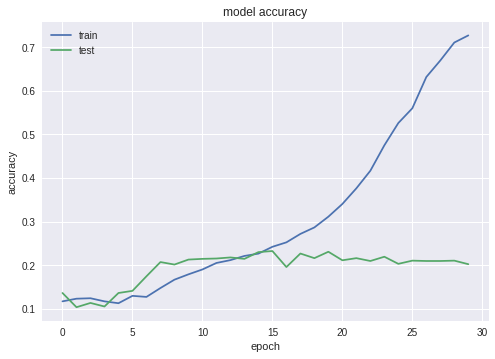

In [119]:

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Plotting loss

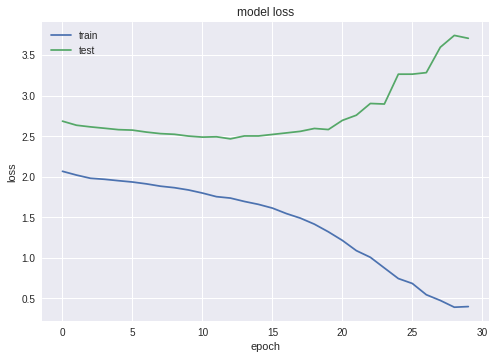

In [120]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Transfer Learning**

Using a pretrained MobileNet model to classify

In [0]:
cnv_model = MobileNet(input_shape=(128, 128, 3),
                                 include_top=False,
                                 weights='imagenet',
                                 
                                 pooling='avg',
                                 classes=17)

model=keras.models.Sequential()
model.add(cnv_model)
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(17,activation='softmax'))

In [0]:
adam=Adam(lr=0.00001)
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [123]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_128 (Model)   (None, 1024)              3228864   
_________________________________________________________________
dense_14 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               65664     
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 17)                2193      
Total params: 3,821,521
Trainable params: 3,799,633
Non-trainable params: 21,888
_____________________________________________________________

In [124]:
history=model.fit(X_train,np_utils.to_categorical(Y_train),epochs=30,batch_size=32,validation_data=(X_test,np_utils.to_categorical(Y_test)),sample_weight=cumulative_s_weights(class_weights,sample_weight_train))

Train on 4913 samples, validate on 1228 samples
Epoch 1/30
4913/4913 [==============================] - 31s 6ms/step - loss: 2.3177 - acc: 0.0914 - val_loss: 2.6663 - val_acc: 0.1531
Epoch 2/30
4913/4913 [==============================] - 23s 5ms/step - loss: 2.0522 - acc: 0.1335 - val_loss: 2.5673 - val_acc: 0.1963
Epoch 3/30
4913/4913 [==============================] - 23s 5ms/step - loss: 1.9249 - acc: 0.1671 - val_loss: 2.5014 - val_acc: 0.2402
Epoch 4/30
4913/4913 [==============================] - 23s 5ms/step - loss: 1.8124 - acc: 0.1976 - val_loss: 2.4506 - val_acc: 0.2679
Epoch 5/30
4913/4913 [==============================] - 23s 5ms/step - loss: 1.7088 - acc: 0.2316 - val_loss: 2.4026 - val_acc: 0.2850
Epoch 6/30
4913/4913 [==============================] - 23s 5ms/step - loss: 1.6189 - acc: 0.2542 - val_loss: 2.3613 - val_acc: 0.2932
Epoch 7/30
4913/4913 [==============================] - 23s 5ms/step - loss: 1.5808 - acc: 0.2681 - val_loss: 2.3214 - val_acc: 0.3127
Epoch 8

**Plotting Accuracy and Loss**

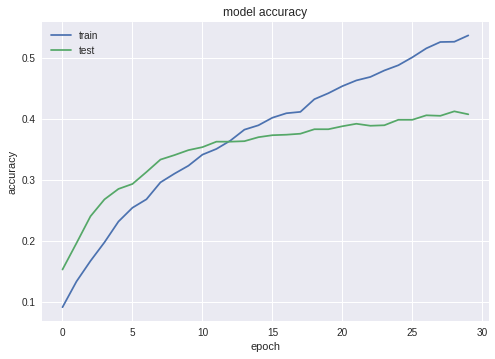

In [125]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

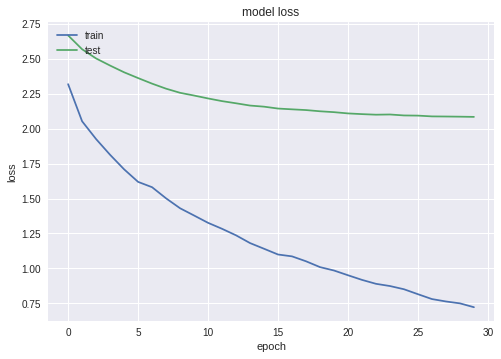

In [126]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Plotting confusion matrix **

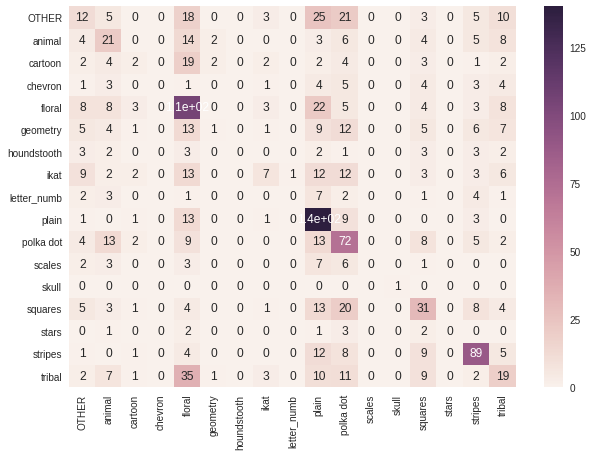

In [128]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
y_preds=model.predict_classes(X_test)
y_test=np.append(Y_test,12)
y_preds=np.append(y_preds,12)

cm = metrics.confusion_matrix(y_test, y_preds)

df_cm = pd.DataFrame(cm, index = [i for i in categories],
                  columns = [i for i in categories])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

**Visualising Results**

In [0]:
predictions = model.predict(X_test)


In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(categories[predicted_label],
                                100*np.max(predictions_array),
                                categories[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(17), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


In [0]:
def show_pred_results(i):

  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions, Y_test, X)
  plt.subplot(1,2,2)
  plot_value_array(i, predictions,  Y_test)
  plt.show()


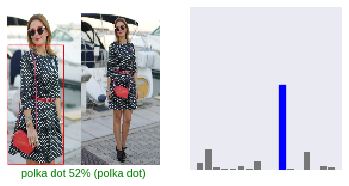

In [134]:
show_pred_results(0)

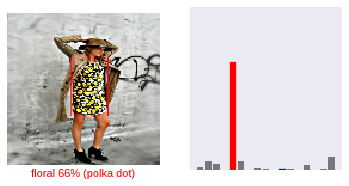

In [135]:
show_pred_results(97)

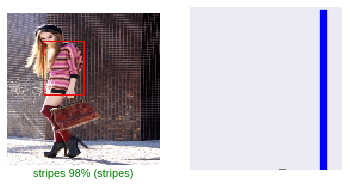

In [136]:
show_pred_results(30)

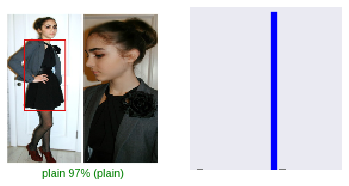

In [137]:
show_pred_results(7)

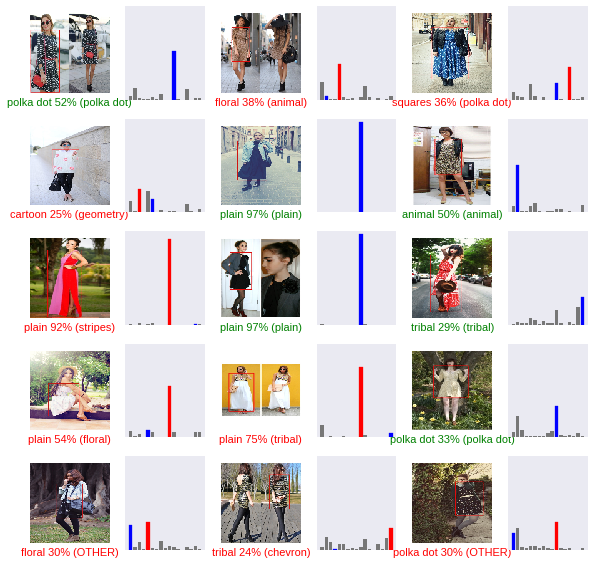

In [138]:

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(10,10))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, Y_test, X)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, Y_test)
plt.show()


In [0]:
def pred_test_images(path):
  test_im=[]
  
  for ims in os.listdir(path):
    img=cv2.resize(cv2.imread(os.path.join(path,ims)),(128,128))
    test_im.append(img)
  num_images=len(test_im)  
  test_im=np.array(test_im)
  test_im_n=test_im/255.0
  preds=model.predict_classes(test_im_n)
  num_rows = 1
  num_cols = 10
  
  plt.figure(figsize=(20,10))
  for i in range(num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plt.imshow(cv2.cvtColor(test_im[i], cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Pred: '+str(categories[preds[i]]))
    
    
  plt.show()
  
  
  


In [0]:
def pred_single_image(path):
  img=cv2.resize(cv2.imread(path),(128,128))
  pred1=model.predict_classes(img[np.newaxis,:,:,:]/255.0)
  plt.imshow(img)
  plt.title('Pred: '+str(categories[pred1[0]]))

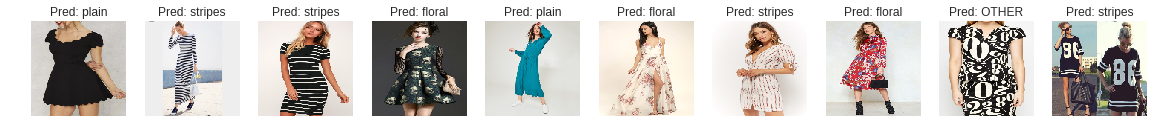

In [152]:
path='/content/drive/My Drive/floral-pattern-classification/test_images/'
pred_test_images(path)

In [0]:
model.predict_classes(X_train).shape

(4913,)

In [0]:
train_preds=model.predict_classes(X_train)
train_probs=model.predict(X_train)


In [0]:
train_preds

array([15,  9, 15,  4, ..., 15,  9, 10, 16])

In [0]:
ind=np.where(train_preds==4)

In [0]:
ims=cv2.resize(cv2.imread(path),(128,128))
pred1_probs=model.predict(ims[np.newaxis,:,:,:]/255.0)
pred1_class

In [0]:
pred1_probs

array([[2.858089e-02, 3.277689e-02, 4.719329e-02, 3.553155e-03, 8.063641e-01, 7.063622e-03, 2.957918e-03,
        1.925573e-02, 3.692268e-03, 7.862893e-03, 5.626585e-03, 2.418215e-03, 1.391666e-03, 7.422516e-03,
        2.776035e-03, 5.167710e-04, 2.054747e-02]], dtype=float32)

In [0]:
def find_similar_images(path,num_images):
  train_preds=model.predict_classes(X_train)
  train_probs=model.predict(X_train)
  ims=cv2.resize(cv2.imread(path),(128,128))
  pred1=model.predict_classes(ims[np.newaxis,:,:,:]/255.0)
  pred1_probs=model.predict(ims[np.newaxis,:,:,:]/255.0)
  
  ind=np.where(train_preds==pred1[0])
  
  pr_diff=[]
  for i in ind[0]:
   
    pr_diff.append(abs(train_probs[i][pred1[0]]-pred1_probs[0][pred1[0]]))
  
  so=np.argsort(pr_diff)
 
  sim_im_ind=ind[0][so]
  num_cols=10
  num_rows=num_images//num_cols+1
  plt.imshow(cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB))
  plt.title('Query Image',color='red')
  plt.show()
  plt.figure(figsize=(20,30))
  
  for i in range(num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plt.imshow(cv2.cvtColor(X[splt_idx+sim_im_ind[i]], cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Similar Image',color='green')
    
  plt.show()
    
  
  

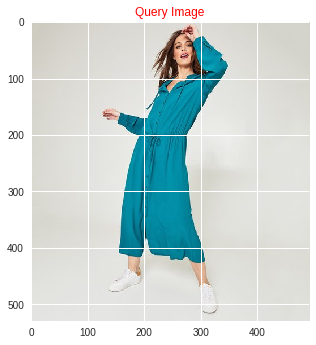

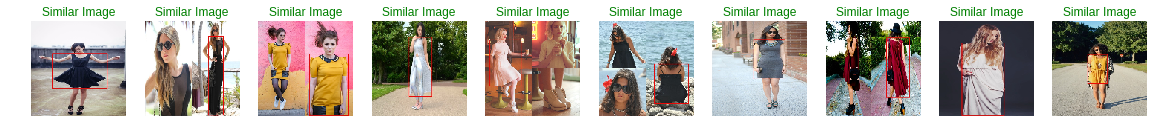

In [156]:
path='/content/drive/My Drive/floral-pattern-classification/test_images/test7.jpg'
find_similar_images(path,10)

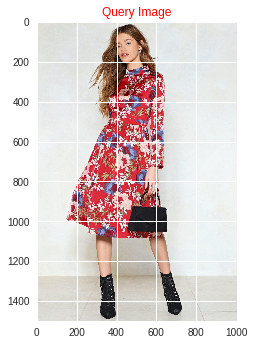

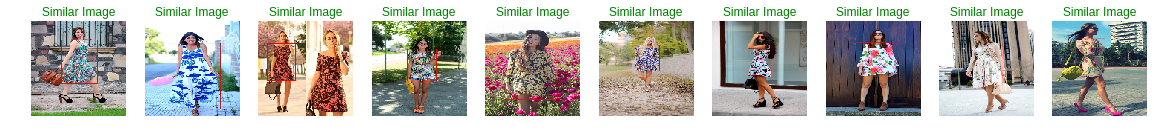

In [157]:
path='/content/drive/My Drive/floral-pattern-classification/test_images/test1.jpeg'
find_similar_images(path,10)

**STEPS TAKEN**

1. Checked the csv file for any missing or NULL values.
2. Created an image dataset by downloading the images from the URLs present in the csv file (using the requests library).
3. Viewed some sample images present in each class
4. Checked the data distribution.
5. Undersampled two classes to prevent the imbalanced classes problem.
6. Generated sample weights and class weights for each samples and each class and combined them to get cumulative sample weights to adjust the loss function.
7. Built an CNN model to solve the dress pattern classification problem.
8. Used a pre trained MobileNet model to achieve better accuracy on the results and less training time .
9. Visualised the results obtained and tried to understand the errors made by the model.
10. Added a feature to extract similar images given a query image.


**OBSERVATIONS**

1. I was able to achieve 40 % accuracy using transfer learning .
2. Analysing the results we find that some classes are predicted more accurately than others like plain or stripes while some classes are not for example skulls .
3. Adding more data to the less accurate class can improve that.
4. Noise reduction could also be considered for improving the accuracy.
5. Images can be cropped to fit only the dress and the cropped image to be fed to the model.

**FUTURE WORK**

1. Crop images to extract just the dress from images.
2. I tried to do that with edge detection using cv2.Canny() and then drawing contours to crop the dress.
3. Did not work as accurately as i expected it to.


In [0]:
#Code to detect dress in a image

import os
import time
import cv2
path='/content/drive/My Drive/floral-pattern-classification/dresses/'
cropped_images=[]
idxs=[]
start=time.time()
for images in sorted(os.listdir(path)):
  im=cv2.imread(os.path.join(path,images))
  edged = cv2.Canny(im, 380, 420,L2gradient=True)
  (im2,cnts, _) = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  idx = 0
  for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    if h > w and w>80 and h>80 and idx<1:
      idx+=1
      new_img=im[y:y+h,x:x+w]
      cropped_images.append(new_img)

**SOME CROPPED IMAGES**

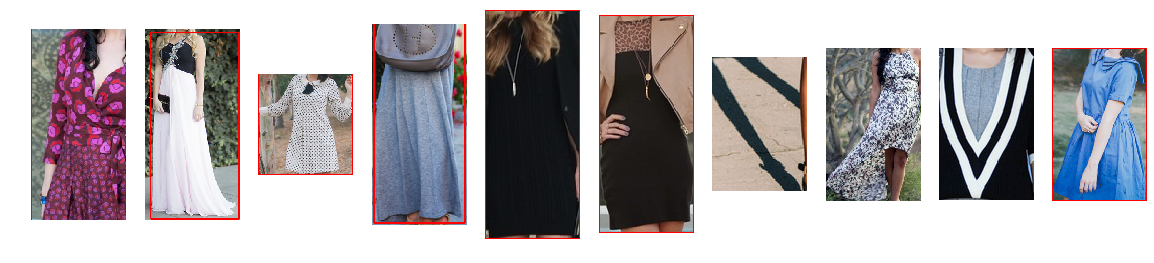

In [173]:
figsize=(20,20)
f=plt.figure(figsize=figsize)
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.axis('off')
  plt.imshow(cv2.cvtColor(cropped_images[i], cv2.COLOR_BGR2RGB))
  

**Some images are cropped perfectly and some not so much . If the dress can be cropped from the image perfectly then noise can be reduced from the model and accuracy can be improved drastically.**